In [1]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

In [2]:
mun_name =  set(["Puebla",
                 "San Andrés Cholula",
                 "Ocoyucan",
                 "Cuautlancingo"])

In [3]:
Pue = gp.read_file("../data/21_puebla/conjunto_de_datos/21mun.shx")
sil = gp.read_file("../data/21_puebla/conjunto_de_datos/21sil.shx")
sip = gp.read_file("../data/21_puebla/conjunto_de_datos/21sip.shx")
sia = gp.read_file("../data/21_puebla/conjunto_de_datos/21sia.shx")
vegetacion = gp.read_file("../data/21_puebla/702825717032_s/e14b43_vegeta_dens50_a_utm.shx")
mun = Pue[Pue["NOMGEO"].isin(mun_name)]
mun_keys = set(mun.CVE_MUN.values.tolist())


In [4]:
sip_mun = sip[sip.CVE_MUN.isin(mun_keys)]
sia_mun = sia[sia.CVE_MUN.isin(mun_keys)]
sil_mun = sil[sil.CVE_MUN.isin(mun_keys)]

In [8]:
sil_mun.GEOGRAFICO.value_counts()

GEOGRAFICO
Lindero                                           1287
Puente                                             417
Corriente de Agua                                  200
Restricción de Paso a Peatones y/o Automóviles      76
Canal                                               46
Camino                                              24
Vía Férrea                                          16
Carretera                                            6
Name: count, dtype: int64

In [9]:
jardines_parques = set(["Parque","Jardín"])
info_jardines_parques = sip_mun[sip_mun.TIPO.isin(jardines_parques)]

camellon_glorieta =  set(["Camellón","Glorieta"])
area_verde = set(["Área Verde","Jardín", "Parque"])
caminos_carreteras = set(["Carretera","Camino"])
linderos = set(["Lindero"])

info_camellon = sia_mun[sia_mun.TIPO.isin(camellon_glorieta)]
info_area_verde = sia_mun[sia_mun.TIPO.isin(area_verde)]
corrienteAgua = sia_mun[sia_mun.GEOGRAFICO.isin(set(["Cuerpo de Agua"]))]
corriente_Agua = sil_mun[sil_mun["GEOGRAFICO"] == "Corriente de Agua"]

Linderos = sil_mun[sil_mun["GEOGRAFICO"].isin(linderos)]

Carretera = sil_mun[sil_mun["GEOGRAFICO"].isin(caminos_carreteras)]

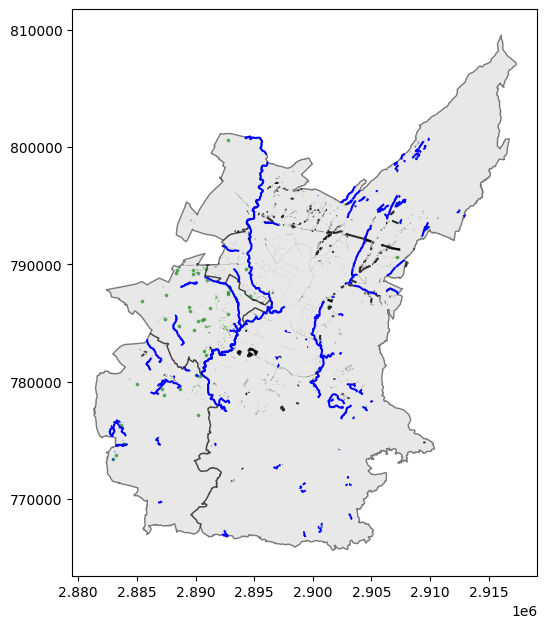

In [11]:
fig, ax = plt.subplots(figsize=(6,10))
mun.plot(ax=ax, color="lightgray", edgecolor="black",alpha=0.5)
info_camellon.plot(ax=ax, color="black",alpha=0.8, markersize=3)
Linderos.plot(ax=ax, color="black",alpha=0.8, markersize=1)

info_jardines_parques.plot(ax=ax, color="green",alpha=0.5, markersize=3)
info_area_verde.plot(ax=ax, color="green",alpha=0.5, markersize=10)

corriente_Agua.plot(ax=ax, color="blue",alpha=1, markersize=3)
corrienteAgua.plot(ax=ax, color="blue",alpha=1, markersize=3)
# ax.set_title(" '{}' - NL".format(mun_name), fontsize=12)
plt.show()